<IPython.core.display.Javascript object>


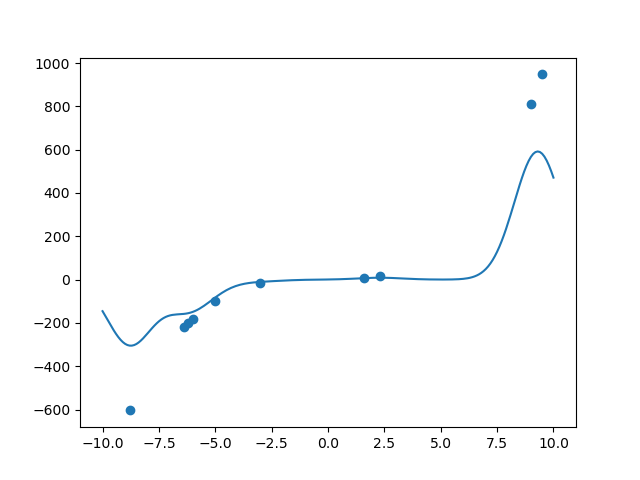

[ 8.76908959e+00 -1.73741490e+01  3.66455916e+02  2.43301895e+02
 -2.99180509e+02 -4.47260877e+01 -3.08276970e+01 -6.27739666e+01
 -1.03708768e-01 -7.42250715e+00]


NameError: name 'pn' is not defined

In [2]:
"""
    This 
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.optimize import minimize
%matplotlib notebook

# helper functions
def noisy_func(Xs, func, sample, noise):
    Xs = rng.choice(Xs, sample)
    return Xs, np.array([func(x)+2*(rng.random()-0.5)*noise for x in Xs])

def plot_kernel(Xs, kernel, xp = np.float64(0)):
    fig = plt.figure()
    Ys = np.array([kernel(x,xp) for x in Xs])
    plt.plot(Xs,Ys)

def plot_basis(Xs, basis_funcs):
    fig = plt.figure()
    for f in basis_funcs:
        Ys = np.array([f(x) for x in Xs])
        plt.plot(Xs,Ys)
        
def graph_3d(dim1, dim2, dim3):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    #dim1, dim2 = np.meshgrid(dim1, dim2)
    #print(dim1.shape, dim2.shape, Y.shape)
    topo = ax.plot_trisurf(dim1,dim2,dim3)
    plt.show()
        
def interval_(a,b,dx, density_function = 0):
    return np.arange(a,b+dx,dx)


# basis functions
def poly_basis(N):
    return np.array([lambda x, n=n:x**(n) for n in range(N+1)])

def gaussian_basis(N, interval, sigma=1):
    return np.array([lambda x,mu=mu:np.exp(-0.5*((x-mu)/sigma)**2) for mu in interval_(interval[0],interval[-1],(interval[-1]-interval[0])/N)])

def sigmoid_basis(N, interval, sigma=1):
    return np.array([lambda x,mu=mu:1/(1+np.exp(-((x-mu)/sigma))) for mu in interval_(interval[0],interval[-1],(interval[-1]-interval[0])/N)])

# kernels
def polynomial(x,xp):
    M = 5
    C = 4
    return (x.T@xp+C)**M if type(x) != np.float64 else (x*xp)**M

def homogenous(x,xp):
    return max(((x-xp)**2).sum(),0) if type(x) != np.float64 else max(0,2-(x-xp)**2)

def stationary(x,xp):
    return (x-xp).sum() if type(x) != np.float64 else max(0,2-np.abs(x-xp))

def linear(x,xp):
    return x@xp if type(x) != np.float64 else np.max(1-np.abs(x*xp),0)

def RBF(x,xp):
    return np.exp(-0.5*((x-xp)/1)**2)

# conversion
def feature_map(basis):
    return lambda x,xp: np.array([f(x)*f(xp) for f in basis]).sum()

# Regression to data
def linear_regression(X,Y,basis,lambda_):
    phi = np.array([[f(x) for f in basis] for x in X])
    return np.linalg.inv(lambda_*np.eye(basis.size)+phi.T@phi)@phi.T@Y

def kernel_regression(X,Y,kernel, lambda_):
    K = np.array([[kernel(x,xp) for x in X] for xp in X])
    return np.linalg.inv(K+lambda_*np.eye(X.shape[0]))@Y

# testing
def dummy_linear(interval, basis, func, noise, sample, lambda_):
    #plt.plot(inter,np.array([func(x) for x in inter]))
    Xs, Ys_ = noisy_func(interval, lambda x:func(x), sample, noise)
    plt.scatter(Xs,Ys_)
    w = linear_regression(Xs,Ys_,basis,lambda_)
    print(w)
    Ys = np.array([np.array([f(x) for f in basis])@w for x in interval])
    plt.plot(interval, Ys)
    plt.scatter([0],[0], s = 0)
    #plt.scatter(Ys_,[np.array([f(x) for f in basis[:10]]).sum() for x in Xs])
    #graph_3d(interval,Ys,[basis[6](x) for x in interval])
    
def dummy_kernel(interval, kernel, func, noise, sample, lambda_):
    #plt.plot(inter,np.array([func(x) for x in inter]))
    Xs, Ys_ = noisy_func(interval, lambda x:func(x), sample, noise)
    plt.scatter(Xs,Ys_)
    w = kernel_regression(Xs,Ys_,kernel,lambda_)
    print(w)
    Ys = np.array([np.array([kernel(x,xp) for xp in Xs])@w for x in interval])
    plt.plot(inter, Ys)
    return
    for x in range(len(Xs)):
        for xp in range(x+1,len(Xs)):
            plt.plot([Xs[x],Xs[xp]],[Ys_[x],Ys_[xp]])

def compare_lin_kern(interval, kernel, basis, func, noise, sample, lambda_):
    Xs, Ys_ = noisy_func(interval, lambda x:func(x), sample, noise)
    plt.scatter(Xs,Ys_)
    w = kernel_regression(Xs,Ys_,kernel,lambda_)
    Ys = np.array([np.array([kernel(x,xp) for xp in Xs])@w for x in interval])
    plt.plot(inter, Ys)
    w = linear_regression(Xs,Ys_,basis,lambda_)
    Ys = np.array([np.array([f(x) for f in basis])@w for x in interval])
    plt.plot(interval, Ys)


rng = np.random.default_rng(12)
inter = interval_(-10,10,0.1)
#basis = sigmoid_basis(10, inter)
#basis = gaussian_basis(10, inter)
#basis = sigmoid_basis(50, inter)
#plot_basis(inter,basis)
#plot_kernel(interval_(-20,20,0.01),feature_map(basis))
#plot_kernel(interval_(-5,5,0.01),homogenous)
function = lambda x:x**2+x**3
#dummy_linear(inter, basis, function, 0.4,40,1)
#dummy_kernel(inter, feature_map(basis), function, 0.4,40,1)
dummy_kernel(inter, RBF, function, 0,10,1)
#compare_lin_kern(inter, feature_map(basis),basis, function, 1,30,1)

# Testing code
img_dims = np.array((200,200))
noise = pn.PerlinNoise(img_dims)
noise.generate_fractal([100],[20])
time1 = time.time()
SLF = SparseLocalisedFunctions(noise.noise, max_iter = 1)
print(f"Init time: {time.time()-time1}")
time1 = time.time()
SLF.decompose()
print(f"Compression time: {time.time()-time1}")
time1 = time.time()
SLF.compose()
print(f"Decompression time: {time.time()-time1}")